In [56]:
import pandas as pd
import numpy as np


In [57]:
customer_data_cleaned=pd.read_csv('C:/Users/sawan/e-commerce_Project/data/processed/customer_data.csv')
customer_data_cleaned.head()

,customerid,date,Days_Since_Last_Purchase,total_spend,Average_Transaction_Value,Total_Transactions,Total_Products_Purchased,Unique_Products_Purchased,Average_Days_Between_Purchases,Favorite_Shopping_Day,Favorite_Shopping_Hour,is_uk,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12346.0,2011-01-18,325,0.00,0.000000,2,0,1,0.000000,1,10,1,0.000000,0.000000,0.000000
1,12347.0,2011-12-07,2,4310.00,23.681319,7,2458,103,2.000000,1,14,0,615.714286,341.070789,4.486071
2,12348.0,2011-09-25,75,1437.24,53.231111,4,2332,21,10.846154,3,19,0,359.310000,203.875689,-100.884000
3,12349.0,2011-11-21,18,1457.55,20.243750,1,630,72,0.000000,0,9,0,1457.550000,0.000000,0.000000
4,12350.0,2011-02-02,310,294.40,18.400000,1,196,16,0.000000,2,16,0,294.400000,0.000000,0.000000


In [58]:
customer_data_cleaned.shape

(4143, 15)

In [59]:
customer_data_cleaned.dropna(inplace=True)

In [60]:
customer_data_cleaned['date'] = pd.to_datetime(customer_data_cleaned['date'])

# Standardizing data

We need to scale the features of the customer data except these 3:
1. CustomerID: This feature is just an identifier for the customers and does not contain any meaningful information for clustering.
2. Is_UK: This is a binary feature indicating whether the customer is from the UK or not. Since it already takes a value of 0 or 1, scaling it won't make any significant difference.
3. Day_Of_Week: This feature represents the most frequent day of the week that the customer made transactions. Since it's a categorical feature represented by integers (1 to 7), scaling it would not be necessary.

In [61]:
# Initialize the StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# List of columns that don't need to be scaled
columns_to_exclude = ['customerid', 'is_uk', 'Favorite_Shopping_Day','date']

# List of columns that need to be scaled
columns_to_scale = customer_data_cleaned.columns.difference(columns_to_exclude)

# Copy the cleaned dataset
customer_data_scaled = customer_data_cleaned.copy()

# Applying the scaler to the necessary columns in the dataset
customer_data_scaled[columns_to_scale] = scaler.fit_transform(customer_data_scaled[columns_to_scale])

In [62]:
customer_data_scaled.head()

,customerid,date,Days_Since_Last_Purchase,total_spend,Average_Transaction_Value,Total_Transactions,Total_Products_Purchased,Unique_Products_Purchased,Average_Days_Between_Purchases,Favorite_Shopping_Day,Favorite_Shopping_Hour,is_uk,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12346.0,2011-01-18,2.337193,-0.828947,-0.748199,-0.478251,-0.795638,-0.920148,-0.390539,1,-1.088844,1,-1.336559,-0.722313,0.093083
1,12347.0,2011-12-07,-0.902772,2.380411,0.083142,0.661229,2.131616,0.799803,-0.124909,1,0.648269,0,0.993703,1.288429,0.119878
2,12348.0,2011-09-25,-0.170520,0.241266,1.120499,-0.022459,1.981562,-0.582902,1.049992,3,2.819660,0,0.023303,0.479612,-0.509469
3,12349.0,2011-11-21,-0.742278,0.256389,-0.037535,-0.706147,-0.045365,0.277073,-0.390539,0,-1.523122,0,4.179756,-0.722313,0.093083
4,12350.0,2011-02-02,2.186730,-0.609728,-0.102260,-0.706147,-0.562220,-0.667214,-0.390539,2,1.516825,0,-0.222358,-0.722313,0.093083


# Dimensionality reduction

In [63]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [64]:
customer_data_scaled.drop('date' , axis=1, inplace=True)

In [65]:
customer_data_scaled.reset_index( inplace=True)

In [66]:
customer_data_scaled

,index,customerid,Days_Since_Last_Purchase,total_spend,Average_Transaction_Value,Total_Transactions,Total_Products_Purchased,Unique_Products_Purchased,Average_Days_Between_Purchases,Favorite_Shopping_Day,Favorite_Shopping_Hour,is_uk,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,0,12346.0,2.337193,-0.828947,-0.748199,-0.478251,-0.795638,-0.920148,-0.390539,1,-1.088844,1,-1.336559,-0.722313,0.093083
1,1,12347.0,-0.902772,2.380411,0.083142,0.661229,2.131616,0.799803,-0.124909,1,0.648269,0,0.993703,1.288429,0.119878
2,2,12348.0,-0.170520,0.241266,1.120499,-0.022459,1.981562,-0.582902,1.049992,3,2.819660,0,0.023303,0.479612,-0.509469
3,3,12349.0,-0.742278,0.256389,-0.037535,-0.706147,-0.045365,0.277073,-0.390539,0,-1.523122,0,4.179756,-0.722313,0.093083
4,4,12350.0,2.186730,-0.609728,-0.102260,-0.706147,-0.562220,-0.667214,-0.390539,2,1.516825,0,-0.222358,-0.722313,0.093083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4064,4138,18280.0,1.855712,-0.694467,-0.114196,-0.706147,-0.742047,-0.768387,-0.390539,0,-1.523122,1,-0.653052,-0.722313,0.093083
4065,4139,18281.0,0.882720,-0.768766,-0.342883,-0.706147,-0.731329,-0.818974,-0.390539,6,-1.088844,1,-1.030684,-0.722313,0.093083
4066,4140,18282.0,-0.852617,-0.697445,-0.271306,-0.250355,-0.678929,-0.734663,0.915474,4,0.213991,1,-1.002375,-0.635104,-0.031866
4067,4141,18283.0,-0.892741,0.689787,-0.648616,2.712294,0.818044,3.480904,-0.330051,3,0.648269,1,-0.564650,0.255134,0.226390


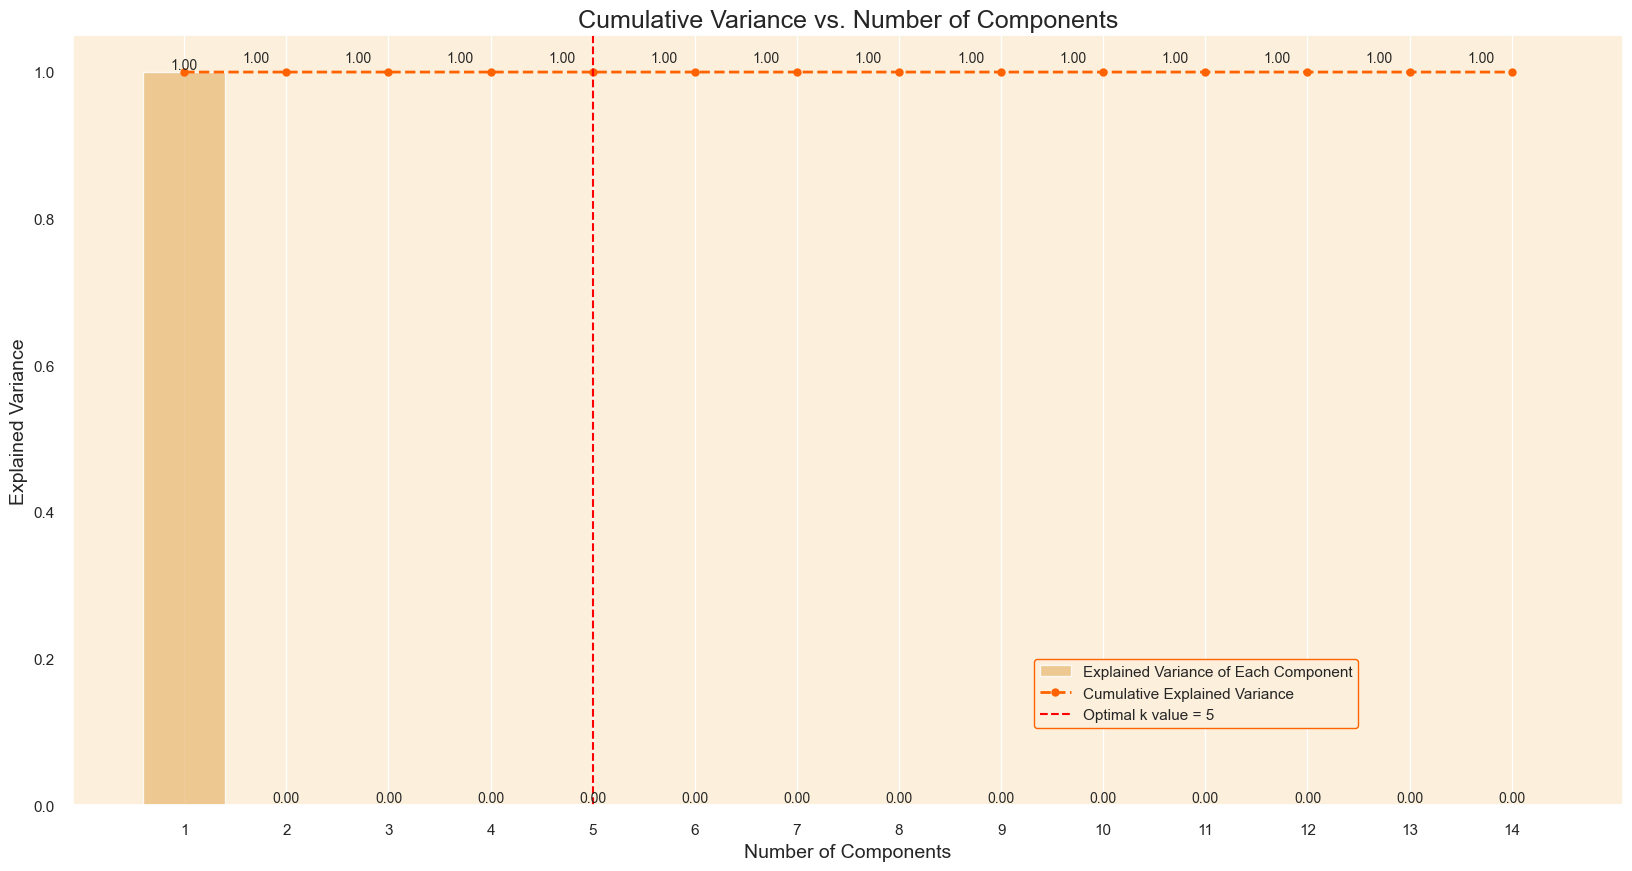

In [67]:
# Setting customerid as the index column
customer_data_scaled.set_index('customerid', inplace=True)

# Apply PCA
pca = PCA().fit(customer_data_scaled)

# Calculate the Cumulative Sum of the Explained Variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Set the optimal k value (based on our analysis, we can choose 6)
optimal_k = 5
# Set seaborn plot style
sns.set_theme(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')

# Plot the cumulative explained variance against the number of components
plt.figure(figsize=(20, 10))

# Bar chart for the explained variance of each component
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)),
                      y=explained_variance_ratio,
                      color='#fcc36d',
                      alpha=0.8)

# Line plot for the cumulative explained variance
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance,
                     marker='o', linestyle='--', color='#ff6200', linewidth=2)

# Plot optimal k value line
optimal_k_line = plt.axvline(optimal_k - 1, color='red', linestyle='--', label=f'Optimal k value = {optimal_k}') 

# Set labels and title
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

# Customize ticks and legend
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot, optimal_k_line],
           labels=['Explained Variance of Each Component', 'Cumulative Explained Variance', f'Optimal k value = {optimal_k}'],
           loc=(0.62, 0.1),
           frameon=True,
           framealpha=1.0,  
           edgecolor='#ff6200')  
# Display the variance values for both graphs on the plots
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')   
plt.show()

Here, we can observe that:

The first component explains approximately 29% of the variance.

The first two components together explain about 53% of the variance.

The first three components explain approximately 62% of the variance, and so on.

To choose the optimal number of components, we generally look for a point where adding another component doesn't significantly increase the cumulative explained variance, often referred to as the "elbow point" in the curve.

From the plot, we can see that the increase in cumulative variance starts to slow down after the 6th component (which captures about 83% of the total variance).

Considering the context of customer segmentation, we want to retain a sufficient amount of information to identify distinct customer groups effectively. Therefore, retaining the first 6 components might be a balanced choice, as they together explain a substantial portion of the total variance while reducing the dimensionality of the dataset.

In [68]:
# Creating a PCA object with 6 components
pca = PCA(n_components=6)

# Fitting and transforming the original data to the new PCA dataframe
customer_data_pca = pca.fit_transform(customer_data_scaled)

# Creating a new dataframe from the PCA dataframe, with columns labeled PC1, PC2, etc.
customer_data_pca = pd.DataFrame(customer_data_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

# Adding the customerid index back to the new PCA dataframe
customer_data_pca.index = customer_data_scaled.index

In [69]:
customer_data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
customerid,,,,,,
12346.0,-2064.860306,-2.651623,-1.450484,-0.672948,-0.383293,0.243093
12347.0,-2063.860633,3.450971,-1.679549,-0.280078,-0.127190,0.155138
12348.0,-2062.860397,0.898507,0.431644,0.662663,0.234143,-0.502078
12349.0,-2061.860797,0.876004,-2.731259,0.814049,-1.779186,1.071474
12350.0,-2060.860329,-2.065509,-0.382904,-0.649628,-1.164987,0.536043


In [70]:
customer_data_pca.dropna(inplace=True)

# Model training and evaluation

# K means clustering

K-Means is an unsupervised machine learning algorithm that clusters data into a specified number of groups (K) by minimizing the within-cluster sum-of-squares (WCSS), also known as inertia. The algorithm iteratively assigns each data point to the nearest centroid, then updates the centroids by calculating the mean of all assigned points. The process repeats until convergence or a stopping criterion is reached.

Determining the number of clusters using the Elbow method

What is the Elbow Method?

-> The Elbow Method is a technique for identifying the ideal number of clusters in a dataset. It involves iterating through the data, generating clusters for various values of k. The k-means algorithm calculates the sum of squared distances between each data point and its assigned cluster centroid, known as the inertia or WCSS score. By plotting the inertia score against the k value, we create a graph that typically exhibits an elbow shape, hence the name "Elbow Method". The elbow point represents the k-value where the reduction in inertia achieved by increasing k becomes negligible, indicating the optimal stopping point for the number of clusters

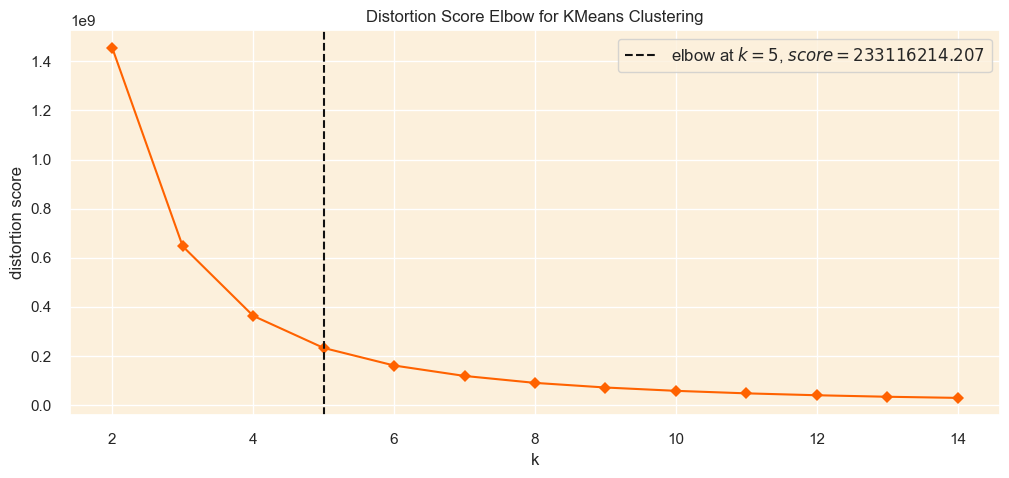

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [71]:
# Set plot style, and background color
sns.set_theme(style='darkgrid', rc={'axes.facecolor': '#fcf0dc'})

# Set the color palette for the plot
sns.set_palette(['#ff6200'])

# Instantiate the clustering model with the specified parameters
km = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=0)

# Create a figure and axis with the desired size
fig, ax = plt.subplots(figsize=(12, 5))

# Instantiate the KElbowVisualizer with the model and range of k values, and disable the timing plot
visualizer = KElbowVisualizer(km, k=(2, 15), timings=False, ax=ax)
# Fit and visualize
visualizer.fit(customer_data_pca)
visualizer.show()


Using the YellowBrick library for the Elbow method, we observe that the suggested optimal k value is 6. However, we don't have a very distinct elbow point in this case, which is common in real-world data. From the plot, we can see that the inertia continues to decrease significantly up to k=5, indicating that the optimum value of k could be between 3 and 7.

So we are choosing k=3 as the optimal value for training our model

# Clustering model K-means

In this step, I am going to apply the K-means clustering algorithm to segment customers into different clusters based on their purchasing behaviors and other characteristics, using the optimal number of clusters determined in the previous step.

It's important to note that the K-means algorithm might assign different labels to the clusters in each run. To address this, we have taken an additional step to swap the labels based on the frequency of samples in each cluster, ensuring a consistent label assignment across different runs.

In [72]:
from collections import Counter


In [73]:
# Apply KMeans clustering using the optimal k
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(customer_data_pca)

# Get the frequency of each cluster
cluster_frequencies = Counter(kmeans.labels_)

# Create a mapping from old labels to new labels based on frequency
label_mapping = {label: new_label for new_label, (label, _) in 
                 enumerate(cluster_frequencies.most_common())}

# Reverse the mapping to assign labels as per your criteria
label_mapping = {v: k for k, v in {2: 1, 1: 0, 0: 2}.items()}

# Apply the mapping to get the new labels
new_labels = np.array([label_mapping[label] for label in kmeans.labels_])

# Append the new cluster labels back to the original dataset
customer_data_cleaned['cluster'] = new_labels

# Append the new cluster labels to the PCA version of the dataset
customer_data_pca['cluster'] = new_labels

In [74]:
customer_data_cleaned.head()

,customerid,date,Days_Since_Last_Purchase,total_spend,Average_Transaction_Value,Total_Transactions,Total_Products_Purchased,Unique_Products_Purchased,Average_Days_Between_Purchases,Favorite_Shopping_Day,Favorite_Shopping_Hour,is_uk,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,cluster
0,12346.0,2011-01-18,325,0.00,0.000000,2,0,1,0.000000,1,10,1,0.000000,0.000000,0.000000,1
1,12347.0,2011-12-07,2,4310.00,23.681319,7,2458,103,2.000000,1,14,0,615.714286,341.070789,4.486071,1
2,12348.0,2011-09-25,75,1437.24,53.231111,4,2332,21,10.846154,3,19,0,359.310000,203.875689,-100.884000,1
3,12349.0,2011-11-21,18,1457.55,20.243750,1,630,72,0.000000,0,9,0,1457.550000,0.000000,0.000000,1
4,12350.0,2011-02-02,310,294.40,18.400000,1,196,16,0.000000,2,16,0,294.400000,0.000000,0.000000,1


# Cluster distribution visulaization

C:\Users\sawan\AppData\Local\Temp\ipykernel_20928\526075892.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h', palette=colors)


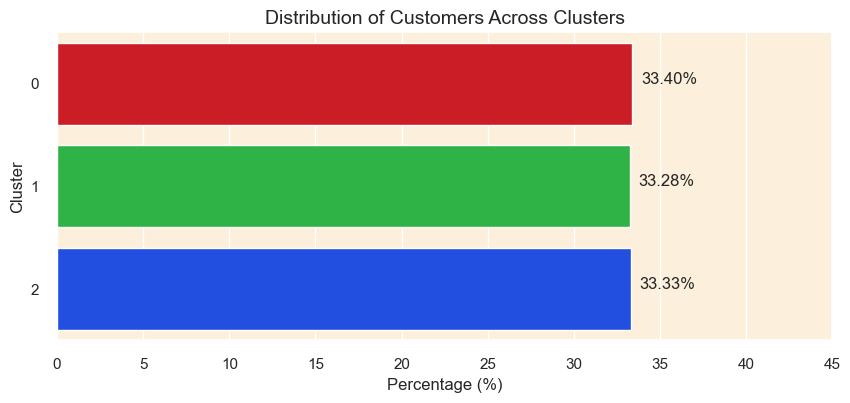

In [75]:
# Calculate the percentage of customers in each cluster
cluster_percentage = (customer_data_pca['cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)
colors = ['#e8000b', '#1ac938', '#023eff']

# Create a horizontal bar plot
plt.figure(figsize=(10, 4))
sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h', palette=colors)

# Adding percentages on the bars
for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value+0.5, index, f'{value:.2f}%')
    
plt.title('Distribution of Customers Across Clusters', fontsize=14)
plt.xticks(ticks=np.arange(0, 50, 5))
plt.xlabel('Percentage (%)')
plt.show()

# Cluster analysis and profiling

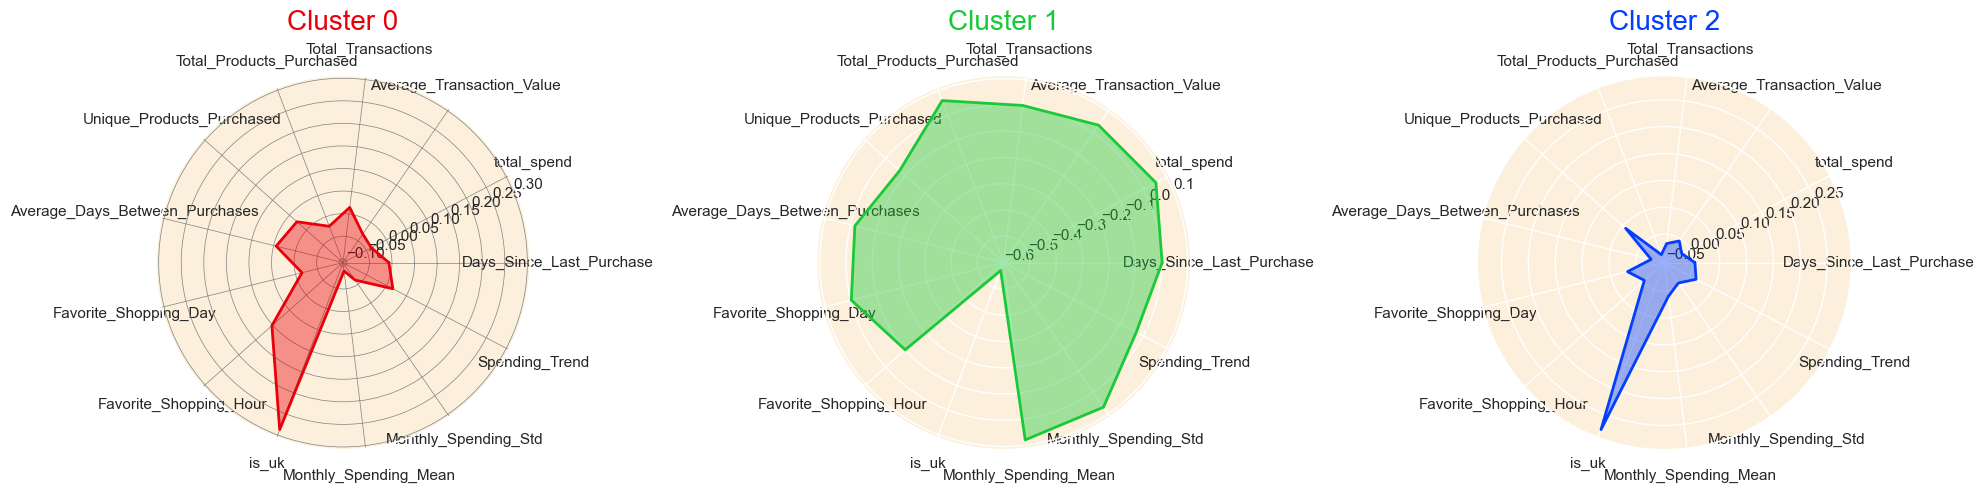

In [76]:
# Setting 'CustomerID' column as index and assigning it to a new dataframe
df_customer = customer_data_cleaned.set_index('customerid')

df_customer.drop('date', axis=1, inplace=True)
# Standardize the data (excluding the cluster column)
scaler = StandardScaler()
df_customer_standardized = scaler.fit_transform(df_customer.drop(columns=['cluster'], axis=1))

# Create a new dataframe with standardized values and add the cluster column back
df_customer_standardized = pd.DataFrame(df_customer_standardized, columns=df_customer.columns[:-1], index=df_customer.index)
df_customer_standardized['cluster'] = df_customer['cluster']

# Calculate the centroids of each cluster
cluster_centroids = df_customer_standardized.groupby('cluster').mean()

# Function to create a radar chart
def create_radar_chart(ax, angles, data, color, cluster):
    # Plot the data and fill the area
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')
    
    # Add a title
    ax.set_title(f'Cluster {cluster}', size=20, color=color, y=1.1)

# Set data
labels=np.array(cluster_centroids.columns)
num_vars = len(labels)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" and append the start to the end
labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]

# Initialize the figure
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw=dict(polar=True), nrows=1, ncols=3)

# Create radar chart for each cluster
for i, color in enumerate(colors):
    data = cluster_centroids.loc[i].tolist()
    data += data[:1]  # Complete the loop
    create_radar_chart(ax[i], angles, data, color, i)

# Add input data
ax[0].set_xticks(angles[:-1])
ax[0].set_xticklabels(labels[:-1])

ax[1].set_xticks(angles[:-1])
ax[1].set_xticklabels(labels[:-1])

ax[2].set_xticks(angles[:-1])
ax[2].set_xticklabels(labels[:-1])

# Add a grid
ax[0].grid(color='grey', linewidth=0.5)

# Display the plot
plt.tight_layout()
plt.show()


# Cluster 0
🎯 Profile: __Sporadic Shoppers with a Preference for Weekend Shopping__  

- Customers in this cluster tend to spend less, with a lower number of transactions and products purchased.  
- They have a slight tendency to shop during the weekends, as indicated by the very high `Day_of_Week` value.  
- Their spending trend is relatively stable but on the lower side, and they have a low monthly spending variation (low `Monthly_Spending_Std`).  
- These customers have not engaged in many cancellations, showing a low cancellation frequency and rate.  
- The average transaction value is on the lower side, indicating that when they do shop, they tend to spend less per transaction.  

____


# Cluster 1 
🎯 Profile: __Infrequent Big Spenders with a High Spending Trend__  
    
- Customers in this cluster show a moderate level of spending, but their transactions are not very frequent, as indicated by the high `Days_Since_Last_Purchase` and `Average_Days_Between_Purchases`.  
- They have a very high spending trend, indicating that their spending has been increasing over time.  
- These customers prefer shopping late in the day, as indicated by the high `Hour` value, and they mainly reside in the UK.  
- They have a tendency to cancel a moderate number of transactions, with a medium cancellation frequency and rate.  
- Their average transaction value is relatively high, meaning that when they shop, they tend to make substantial purchases.  

____


    
# Cluster 2
🎯 Profile: __Frequent High-Spenders with a High Rate of Cancellations__
    
- Customers in this cluster are high spenders with a very high total spend, and they purchase a wide variety of unique products.  
- They engage in frequent transactions, but also have a high cancellation frequency and rate.  
- These customers have a very low average time between purchases, and they tend to shop early in the day (low `Hour` value).  
- Their monthly spending shows high variability, indicating that their spending patterns might be less predictable compared to other clusters.  
- Despite their high spending, they show a low spending trend, suggesting that their high spending levels might be decreasing over time.  

# Recommendation system

In the final phase of this project, I am set to develop a recommendation system to enhance the online shopping experience. This system will suggest products to customers based on the purchasing patterns prevalent in their respective clusters.

I analyze the cleansed customer data to pinpoint the top-selling products within each cluster. Leveraging this information, the system will craft personalized recommendations, suggesting __the top three products__ popular within their cluster that they have not yet purchased. This not only facilitates targeted marketing strategies but also enriches the personal shopping experience, potentially boosting sales.

In [77]:
outliers_data= pd.read_csv('C:/Users/sawan/e-commerce_Project/data/processed/outliers_data.csv')

In [78]:
customer_data=pd.read_csv('C:/Users/sawan/e-commerce_Project/data/processed/customer_data.csv')

In [93]:
customer_data_cleaned.to_csv('C:/Users/sawan/e-commerce_Project/data/processed/customer_data_cleaned.csv')


In [79]:
customer_data

,customerid,date,Days_Since_Last_Purchase,total_spend,Average_Transaction_Value,Total_Transactions,Total_Products_Purchased,Unique_Products_Purchased,Average_Days_Between_Purchases,Favorite_Shopping_Day,Favorite_Shopping_Hour,is_uk,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12346.0,2011-01-18,325,0.00,0.000000,2,0,1,0.000000,1,10,1,0.000000,0.000000,0.000000
1,12347.0,2011-12-07,2,4310.00,23.681319,7,2458,103,2.000000,1,14,0,615.714286,341.070789,4.486071
2,12348.0,2011-09-25,75,1437.24,53.231111,4,2332,21,10.846154,3,19,0,359.310000,203.875689,-100.884000
3,12349.0,2011-11-21,18,1457.55,20.243750,1,630,72,0.000000,0,9,0,1457.550000,0.000000,0.000000
4,12350.0,2011-02-02,310,294.40,18.400000,1,196,16,0.000000,2,16,0,294.400000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4138,18280.0,2011-03-07,277,180.60,18.060000,1,45,10,0.000000,0,9,1,180.600000,0.000000,0.000000
4139,18281.0,2011-06-12,180,80.82,11.545714,1,54,7,0.000000,6,10,1,80.820000,0.000000,0.000000
4140,18282.0,2011-12-02,7,176.60,13.584615,3,98,12,9.833333,4,13,1,88.300000,14.792674,-20.920000
4141,18283.0,2011-12-06,3,2039.58,2.836690,16,1355,262,0.455432,3,14,1,203.958000,165.798738,22.319273


In [99]:
customer_data_cleaned.tail(100)

,customerid,date,Days_Since_Last_Purchase,total_spend,Average_Transaction_Value,Total_Transactions,Total_Products_Purchased,Unique_Products_Purchased,Average_Days_Between_Purchases,Favorite_Shopping_Day,Favorite_Shopping_Hour,is_uk,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,cluster
4040,18147.0,2011-10-25,45,179.34,25.620000,2,203,7,10.333333,1,12,1,89.670000,13.024907,-18.420000,0
4041,18149.0,2011-10-20,50,612.08,38.255000,3,310,11,14.800000,4,12,1,204.026667,131.370576,-82.690000,0
4042,18150.0,2011-11-07,32,566.58,15.312973,3,332,29,4.694444,6,10,1,188.860000,37.240687,-37.140000,0
4043,18151.0,2011-07-28,134,653.35,17.193421,2,355,38,4.189189,3,11,1,326.675000,19.975767,28.250000,0
4044,18154.0,2011-12-06,3,399.19,19.009048,2,255,15,2.000000,3,10,1,199.595000,29.549992,-41.790000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4138,18280.0,2011-03-07,277,180.60,18.060000,1,45,10,0.000000,0,9,1,180.600000,0.000000,0.000000,0
4139,18281.0,2011-06-12,180,80.82,11.545714,1,54,7,0.000000,6,10,1,80.820000,0.000000,0.000000,0
4140,18282.0,2011-12-02,7,176.60,13.584615,3,98,12,9.833333,4,13,1,88.300000,14.792674,-20.920000,0
4141,18283.0,2011-12-06,3,2039.58,2.836690,16,1355,262,0.455432,3,14,1,203.958000,165.798738,22.319273,0


In [81]:
df= pd.read_csv('C:\\Users\\sawan\\e-commerce_Project\\data\\processed\\ecommerce_data_clean.csv')

In [82]:
df.head(5)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,totalprice,date,dayofweek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2


In [83]:
# Step 1: Extract the CustomerIDs of the outliers and remove their transactions from the main dataframe
outlier_customer_ids = outliers_data['customerid'].astype('float').unique()
df_filtered = df[~df['customerid'].isin(outlier_customer_ids)]

# Step 2: Ensure consistent data type for customerid across both dataframes before merging
customer_data_cleaned['customerid'] = customer_data_cleaned['customerid'].astype('float')

# Step 3: Merge the transaction data with the customer data to get the cluster information for each transaction
merged_data = df_filtered.merge(customer_data_cleaned[['customerid', 'cluster']], on='customerid', how='inner')

# Step 4: Identify the top 10 best-selling products in each cluster based on the total quantity sold
best_selling_products = merged_data.groupby(['cluster', 'stockcode', 'description'])['quantity'].sum().reset_index()
best_selling_products = best_selling_products.sort_values(by=['cluster', 'quantity'], ascending=[True, False])
top_products_per_cluster = best_selling_products.groupby('cluster').head(10)

# Step 5: Create a record of products purchased by each customer in each cluster
customer_purchases = merged_data.groupby(['customerid', 'cluster', 'stockcode'])['quantity'].sum().reset_index()

# Step 6: Generate recommendations for each customer in each cluster
recommendations = []
for cluster in top_products_per_cluster['cluster'].unique():
    top_products = top_products_per_cluster[top_products_per_cluster['cluster'] == cluster]
    customers_in_cluster = customer_data_cleaned[customer_data_cleaned['cluster'] == cluster]['customerid']
    
    for customer in customers_in_cluster:
        # Identify products already purchased by the customer
        customer_purchased_products = customer_purchases[(customer_purchases['customerid'] == customer) & 
                                                         (customer_purchases['cluster'] == cluster)]['stockcode'].tolist()
        
        # Find top 3 products in the best-selling list that the customer hasn't purchased yet
        top_products_not_purchased = top_products[~top_products['stockcode'].isin(customer_purchased_products)]
        top_3_products_not_purchased = top_products_not_purchased.head(3)
        
        # Append the recommendations to the list
        recommendations.append([customer, cluster] + top_3_products_not_purchased[['stockcode', 'description']].values.flatten().tolist())

# Step 7: Create a dataframe from the recommendations list and merge it with the original customer data
recommendations_df = pd.DataFrame(recommendations, columns=['customerid', 'cluster', 'Rec1_StockCode', 'Rec1_Description', \
                                                 'Rec2_StockCode', 'Rec2_Description', 'Rec3_StockCode', 'Rec3_Description'])
customer_data_with_recommendations = customer_data_cleaned.merge(recommendations_df, on=['customerid', 'cluster'], how='right')

In [84]:
top_products_per_cluster.to_csv('C:\\Users\\sawan\\e-commerce_Project\\data\\processed\\top_products_per_cluster.csv', index=False)

In [85]:
customer_data_with_recommendations.set_index('customerid').iloc[:, -6:].sample(10, random_state=0)

,Rec1_StockCode,Rec1_Description,Rec2_StockCode,Rec2_Description,Rec3_StockCode,Rec3_Description
customerid,,,,,,
15382.0,84879,ASSORTED COLOUR BIRD ORNAMENT,85123A,WHITE HANGING HEART T-LIGHT HOLDER,85099B,JUMBO BAG RED RETROSPOT
14878.0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,84879,ASSORTED COLOUR BIRD ORNAMENT,85123A,WHITE HANGING HEART T-LIGHT HOLDER
16034.0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,84879,ASSORTED COLOUR BIRD ORNAMENT,85123A,WHITE HANGING HEART T-LIGHT HOLDER
14494.0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,84879,ASSORTED COLOUR BIRD ORNAMENT,85123A,WHITE HANGING HEART T-LIGHT HOLDER
17301.0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,17003,BROCADE RING PURSE,85123A,WHITE HANGING HEART T-LIGHT HOLDER
14622.0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,84879,ASSORTED COLOUR BIRD ORNAMENT,85123A,WHITE HANGING HEART T-LIGHT HOLDER
15992.0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,85123A,WHITE HANGING HEART T-LIGHT HOLDER,85099B,JUMBO BAG RED RETROSPOT
16558.0,84879,ASSORTED COLOUR BIRD ORNAMENT,17003,BROCADE RING PURSE,85123A,WHITE HANGING HEART T-LIGHT HOLDER
14859.0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,84879,ASSORTED COLOUR BIRD ORNAMENT,85123A,WHITE HANGING HEART T-LIGHT HOLDER


In [86]:
merged_data.head(5)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,totalprice,date,dayofweek,cluster
0,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,2010-12-01,2,1
1,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6,2010-12-01 08:34:00,2.10,13047.0,United Kingdom,12.60,2010-12-01,2,1
2,536367,22748,POPPY'S PLAYHOUSE KITCHEN,6,2010-12-01 08:34:00,2.10,13047.0,United Kingdom,12.60,2010-12-01,2,1
3,536367,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,8,2010-12-01 08:34:00,3.75,13047.0,United Kingdom,30.00,2010-12-01,2,1
4,536367,22310,IVORY KNITTED MUG COSY,6,2010-12-01 08:34:00,1.65,13047.0,United Kingdom,9.90,2010-12-01,2,1


In [87]:
merged_data = merged_data.merge(customer_data_cleaned, on='customerid', how='left')

In [88]:
merged_data.to_csv('C:\\Users\\sawan\\e-commerce_Project\\data\\processed\\merged_data.csv', index=False)

In [89]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301787 entries, 0 to 301786
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   invoiceno                       301787 non-null  object        
 1   stockcode                       301787 non-null  object        
 2   description                     301787 non-null  object        
 3   quantity                        301787 non-null  int64         
 4   invoicedate                     301787 non-null  object        
 5   unitprice                       301787 non-null  float64       
 6   customerid                      301787 non-null  float64       
 7   country                         301787 non-null  object        
 8   totalprice                      301787 non-null  float64       
 9   date_x                          301787 non-null  object        
 10  dayofweek                       301787 non-null  int64  

In [102]:
customer_data_cleaned.query("cluster == 0")

,customerid,date,Days_Since_Last_Purchase,total_spend,Average_Transaction_Value,Total_Transactions,Total_Products_Purchased,Unique_Products_Purchased,Average_Days_Between_Purchases,Favorite_Shopping_Day,Favorite_Shopping_Hour,is_uk,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,cluster
2752,16295.0,2011-11-30,9,1328.55,16.817089,4,841,70,0.692308,2,13,1,664.275,39.633335,-56.050000,0
2753,16297.0,2011-04-04,249,278.55,12.661364,3,181,20,0.857143,2,8,1,139.275,225.814551,-319.350000,0
2754,16298.0,2011-11-17,22,598.20,22.155556,3,198,22,6.269231,2,9,1,199.400,73.748570,65.180000,0
2755,16302.0,2011-08-24,107,212.82,17.735000,2,134,11,1.636364,4,9,1,212.820,0.000000,0.000000,0
2756,16303.0,2011-11-14,25,5305.83,31.771437,4,2621,119,1.843373,1,11,1,1768.610,1225.556439,248.560000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4138,18280.0,2011-03-07,277,180.60,18.060000,1,45,10,0.000000,0,9,1,180.600,0.000000,0.000000,0
4139,18281.0,2011-06-12,180,80.82,11.545714,1,54,7,0.000000,6,10,1,80.820,0.000000,0.000000,0
4140,18282.0,2011-12-02,7,176.60,13.584615,3,98,12,9.833333,4,13,1,88.300,14.792674,-20.920000,0
4141,18283.0,2011-12-06,3,2039.58,2.836690,16,1355,262,0.455432,3,14,1,203.958,165.798738,22.319273,0
